# **AISaturdays Diabetes Challenge**

![AISaturdays](https://www.saturdays.ai/assets/images/ai-saturdays-122x122.png)

Bienvenido al reto de **AISaturdays** de Inteligencia Artificial para la detección de Diabetes.
En este ejercicio se pretende averiguar las personas que pueden padecer diabetes, dado un conjunto de datos de pacientes.

**Instrucciones:**
- Se usará el lenguaje de programación Python 3.
- Se usarán las librerías de python: Pandas, MatPlotLib, Numpy.

**Mediante este ejercicio, aprenderemos:**
- Entender y ejecutar los NoteBooks con Python.
- Ser capaz de utilizar funciones de Python y librerías adicionales.
- Dataset:
 - Obtener el dataset y previsualizar la información del dataset.
 - Limpiar y normalizar la información del dataset.
 - Representar y analizar la información del dataset.
- Crear y entender el concepto de "*Conjunto de datos de entrenamiento*" y "*Conjuntos de datos de test*"
- Crear y entender el concepto de "*Clasificador*" para analizar los datos,  predecir y obtener conclusiones.
- Mejorar la predicción.


¡Empecemos!

#1. Importación de librerías






Descargaremos las herramientas que vamos a utilizar.
Para ejecutar cada celda(caja), **Shift + Enter**.

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#2. Dataset
![texto alternativo](https://i.imgur.com/TMvhIbd.png)




### Obtener el dataset y previsualizar la información del dataset.




 ¡Nuestra tabla! Para poder visualizar y limpiar los datos convertiremos el archivo CSV. 
 
 Los datos se almacenarán en un dataframe llamado **df**.

In [0]:
df = pd.read_csv('diabetes.csv')


0. Muestra los primeros valores del archivo CSV para hacernos una idea del contenido de la tabla con el código: df.head()


---

In [0]:
# Sólo con una línea de código


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Variables



*   **Pregnancies:**  Número de embarazos.

* **Glucose:** Nutriente(azúcares).

* **Insulin:** Hormona que regula la glucosa.

* **BloodPressure:** Presión sanguínea.

* **SkinThickness:** Grosor de la piel. La diabetes se relaciona con aumento del colágeno, que hace la piel más gruesa.

* **BMI:**  Índice de masa corporal, que relaciona la altura y el peso. Los valores usuales se sitúan entre 18,5 y 30.
* **DiabetesPedigreeFunction:**  Función que evalua la probabilidad de desarrollar diabetes en base al historial familar. Cuanto más alta sea, más probabilidad de tener diabetes.
* **Age:** Edad.
* **Outcome:**  ¡El resultado! 0 significa que la persona no tiene diabetes, 1 significa que sí tiene diabetes.






### Analizar dataset:

Para entender la distribución de los datos, vamos a observar:

- La cantidad de datos (count)
- La distribución de los datos mediante cuartiles (25%,50%,75%)
- Media de los datos (mean)
- Mínimos y máximos (min, max)
- Varianza (std)
- ...


1. Tu turno, utiliza la función .describe() para analizar la distribución de los datos


---



In [0]:
# Sólo con una línea de código


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Escribe aquí toda la información relevante que detectes en la tabla anterior:

2. Obtén el total de personas diabéticas y no diabéticas del dataframe, de la columna 'Outcome'


---



In [0]:
# Sólo con una línea de código 


0    500
1    268
Name: Outcome, dtype: int64

### Limpiar y normalizar la información del dataset
![texto alternativo](https://i.imgur.com/8u4xTI7.png)

En este apartado se pretende corregir información en el dataset que pueda faltar o no sea correcta.

Este paso es necesario para mejorar cualquier predicción futura que se realice con el dataset.

Existen diferentes técnicas para corregir y mejorar la calidad e integridad de información de nuestro dataset.






**!** Fíjate en los mínimos (min) de la tabla de arriba.

Tiene sentido que alguien tenga 0 embarazos. ¿Pero 0 concentración de glucosa en sangre? Estaría muerto.

Los datasets no suelen ser perfectos, hay datos incompletos e incorrectos que reducen la eficiencia del modelo. Por ello necesitamos limpiarlo. [Pista](https://new.paradigmadigital.com/wp-content/uploads/2019/02/Pandas_cheatsheet.pdf)

3. ¿Para qué variables no tiene sentido que haya valor 0? Escribe aquí toda la información relevante.

---



4. Reemplaza los valores 0 erróneos del dataset por np.NaN (nulo).


---



In [0]:
# una línea de código 


### Analizar relaciones de la información del dataset

¿Cual de estas variables está relacionada con la diabetes, y cúal no? ¿Están relacionadas entre sí?

Crear una matriz de correlación visual

5. Crea una matriz de correlación visual usando .corr()


---

In [0]:
# una línea de código
crr.style.background_gradient(cmap='coolwarm')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1,0.128135,0.214178,0.100239,0.082171,0.0217189,-0.0335227,0.544341,0.221898
Glucose,0.128135,1,0.223192,0.228043,0.581186,0.232771,0.137246,0.267136,0.49465
BloodPressure,0.214178,0.223192,1,0.226839,0.0982723,0.28923,-0.00280453,0.330107,0.170589
SkinThickness,0.100239,0.228043,0.226839,1,0.184888,0.648214,0.115016,0.166816,0.259491
Insulin,0.082171,0.581186,0.0982723,0.184888,1,0.22805,0.130395,0.220261,0.303454
BMI,0.0217189,0.232771,0.28923,0.648214,0.22805,1,0.155382,0.0258415,0.31368
DiabetesPedigreeFunction,-0.0335227,0.137246,-0.00280453,0.115016,0.130395,0.155382,1,0.0335613,0.173844
Age,0.544341,0.267136,0.330107,0.166816,0.220261,0.0258415,0.0335613,1,0.238356
Outcome,0.221898,0.49465,0.170589,0.259491,0.303454,0.31368,0.173844,0.238356,1


Cuanto más roja sea una celda, mas correlación existe. ¿Cúales son las features(variables) que más se relacionan con el outcome(diabetes)?



Escribe aquí toda la información relevante que detectes en la tabla anterior:

**Limpiar dataset**

 Para limpiar el dataset, podemos sustituir los valores nulos con un valor más representativo. 

Calculamos la mediana del nivel de insulina para diabéticos y no diabéticos

*   Explica por qué motivo consideras que debe aplicarse el siguiente código
*   ¿Qué podría utizarse para mejorar el dato en vez de la mediana? Escribe aquí:



In [0]:
df[["Insulin","Outcome"]].groupby(["Outcome"])[["Insulin"]].median()

,Insulin
Outcome,
0,102.5
1,169.5


Vamos a sustituir los valores nulos de insulina por las medianas: 

**102.5** será el nuevo valor de insulina para las personas sin diabetes.

**169.5** será el nuevo valor de insulina para las personas con diabetes.




In [0]:
df.loc[(df["Outcome"] == 0) & (df["Insulin"].isnull()),"Insulin"] = 102.5

In [0]:
df.loc[(df["Outcome"] == 1) & (df["Insulin"].isnull()),"Insulin"] = 169.5

Listo.¡ Ahora prueba tú!


6. Calcula la mediana de la glucosa.


---

In [0]:
# una línea de código


,Glucose
Outcome,
0,107.0
1,140.0


7. Ahora, usa esos valores para sustituir los nulos en los niveles de glucosa.
---


In [0]:
#dos líneas de código


8. ¿Puedes repetir el mismo proceso para SkinThickness,BloodPressure y BMI?
---

#####SkinThickness

In [0]:
# una línea de código


,SkinThickness
Outcome,
0,27.0
1,32.0


In [0]:
#dos líneas de código


#####BloodPressure

In [0]:
# una línea de código


,BloodPressure
Outcome,
0,70.0
1,74.5


In [0]:
#dos líneas de código


#####BMI

In [0]:
# una línea de código


,BMI
Outcome,
0,30.1
1,34.3


In [0]:
#dos líneas de código


¡Buen trabajo! 

Muestra cuántos nulos hay en cada feature.

*   Explica qué significa esto para el modelo


In [0]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Representar y analizar la información del dataset

Representaremos visualmente los datos de manera que:
- Cada punto simbolice una persona
- Un punto es amarillo si la persona es diabética, y azul si no lo es
- Los ejes x e y representan dos variables que queramos comparar


Función auxiliar para representar gráficas de valores del dataset

In [0]:
# FUNCION AUXILIAR; NO MODIFICAR, SOLO EJECUTAR
import plotly.offline as py
import plotly.graph_objs as go

def plot_feat1_feat2(feat1, feat2) :  
    D = df[(df['Outcome'] != 0)]
    H = df[(df['Outcome'] == 0)]
    trace0 = go.Scatter(x = D[feat1],  y = D[feat2],  name = 'diabetic',  mode = 'markers',  marker = dict(color = '#FFD700', line = dict(width = 1)))
    trace1 = go.Scatter(x = H[feat1],y = H[feat2], name='healthy', mode='markers', marker = dict(color = '#7EC0EE', line = dict(width = 1)))
    layout = dict(title = feat1 +" "+"vs"+" "+ feat2, yaxis = dict(title = feat2,zeroline = False),  xaxis = dict(title = feat1, zeroline = False))
    plots = [trace0, trace1]
    fig = dict(data = plots, layout=layout)
    py.iplot(fig)

Intenta explicar que ocurre en la función auxiliar aquí:

Ejemplo para representar Información de "2 columnas" vs "la que nos interesa avidinar"

In [0]:
# La representación puede lograrse con el siguiente código:
# plot_feat1_feat2('NombreColumna1','NombreColumna2')

9. Representa gráficamente la relación entre 'Glucose' y 'Age'
---

In [0]:
# una línea de código


10. Representa 'BMI' vs 'Outcome'. El eje y es el outcome, así que los valores de abajo son no diabéticos y los de arriba sí
---

In [0]:
# una línea de código

11. Representa 'Pregnancies' vs 'Age'
---

In [0]:
# una línea de código


12. Representa 'Glucose' vs 'BloodPressure'¿Cúal es su relación?
---
---


In [0]:
# una línea de código


13. Representa 'SkinThickness' vs 'BMI'¿Cúal es su relación?
---
---

In [0]:
# una línea de código


14. Representa 'Glucose' vs 'BMI'. ¿Cúal es su relación?
---

In [0]:
# una línea de código


15. Representa 'Insulin' vs 'Outcome'¿Cúal es su relación?
---
---

In [0]:
# una línea de código


16. Representa 'Glucose' vs 'Pregnancies'¿Cúal es su relación?
---
---

In [0]:
# una línea de código


# 3. Clasificación

El clasificador es un algoritmo que nos va a permitir analizar un conjunto de datos y clasificarlos en grupos. 

En Machine Learning se utiliza un clasificador para el análisis de datos en [aprendizaje supervisado](https://es.wikipedia.org/wiki/Aprendizaje_supervisado).

![Clasificación](https://static.javatpoint.com/tutorial/machine-learning/images/classification-algorithm-in-machine-learning.png)



**Ejemplo**
- Dado un conjunto de emails, determinar cuál es spam y cuál no.
- Dado un conjunto de imágenes de animales, determinar cuáles son perros.

**Objetivo**
- En este reto, queremos lograr **clasificar** a las personas en diabéticas (1) y no diabéticas (0). Es un ejercicio de **clasificación**.
- A continuación puede visualizarse la diferencia entre "clasificación" y "regresión"
![Clasificación vs regresión](https://res.cloudinary.com/practicaldev/image/fetch/s--c4Lfzdwy--/c_limit%2Cf_auto%2Cfl_progressive%2Cq_auto%2Cw_880/https://thepracticaldev.s3.amazonaws.com/i/mjshszqx4fj22hs12vfn.png)

**Implementación**
- Crear un conjunto de datos de entrenamiento y un conjunto de datos de test
- Crear un clasificador mediante un [tipo de algoritmo](https://www.javatpoint.com/classification-algorithm-in-machine-learning): *RandomForest, XgBoost, KNN*
- Entrenar el clasificador con los "datos de entrenamiento" y de las "features" que queremos tener en cuenta para el entrenamiento.
- Predecir resultados mediante nuestro set de datos de test o mediante nuevos datos.
- Determinar las conclusiones de los resultados obtenidos en las predicciones, como el % de acierto y precisión obtenida.


In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X =   # datosX
y = # featureAPredecir_y

17. Crea un conjunto de datos de entrenamiento y un conjunto de datos de test
---

In [0]:
# una línea de código
X_train, X_test, y_train, y_test = train_test_split("escribe aquí")



18. Crea el clasificador y entrenalo
---

In [0]:
# Crear clasificador RandomForest
# Una línea de código
 classif = RandomForestClassifier("escribe aquí")


# Entrenar el clasificador con las los datos de entrenamiento y las feature
# Una línea de código
classif.fit("escribe aquí")


0.952755905511811


19. Predecir resultados y determinar acierto. ¡Consigue la mayor precisión posible!
---

In [0]:
# Aplicar classif.predict sobre los datos X de test (X_test)
# Una línea de código
y_pred =

# Mostrar resultado de la predicción del clasificador
print((len(y_test)-sum(abs(y_test-y_pred)))/len(y_test))

# 4. Matriz de Confusión

La Matriz de Confusión es una métrica que nos va a permitir conocer el rendimiento y acierto de una clasificación realizada con Machine Learning.
Podemos encontrar información adicional para entender su objectivo en el siguiente enlace: [ConfusionMatrix](https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62)
![texto alternativo](https://miro.medium.com/max/578/1*7EYylA6XlXSGBCF77j_rOA.png)

20. Crearemos una matriz de confusión para analizar las predicciones anteriores obtenidas de nuestro clasificador.
---

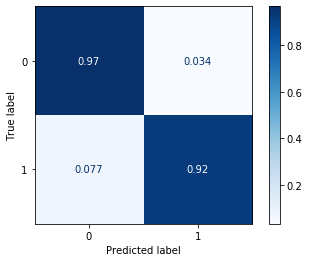

In [0]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
disp = plot_confusion_matrix(classif, X_test, y_test,cmap=plt.cm.Blues,normalize = 'true')

¿Qué porcentaje de casos se situa en cada cuadrante?¿En medicina, es peor un false positive o un false negative?Comenta aquí la matriz y responde a las preguntas:

### Matriz de confusión con más información

In [0]:
# NO MODIFICAR, SÓLO EJECUTAR con SHIFT ENTER
## https://github.com/DTrimarchi10/confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf, group_names=None, categories='auto', count=True, percent=True, cbar=True, xyticks=True, xyplotlabels=True, sum_stats=True, figsize=None, cmap='Blues', title=None):
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])

    if sum_stats:
        accuracy  = np.trace(cf) / float(np.sum(cf))

        if len(cf)==2:
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""

    if figsize==None:
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        categories=False

    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

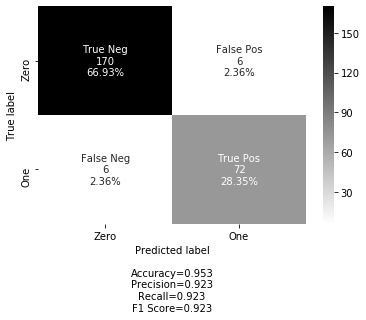

In [0]:
# Mostrar Confusion Matrix con métricas adicionales
# NO MODIFICAR, sólo ejecutar
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
cf_matrix = confusion_matrix(y_test, y_pred)
make_confusion_matrix(cf_matrix, group_names=labels, categories=categories, cmap='binary')

# 5. Mejorar predicción

Mejorar la predicción y resultado de nuestro algoritmo es posible:


*   Aumentar el dataset o mejorar la calidad de los datos existentes.
*   **Optimizar hyperparámetros** de nuestro conjunto de datos y de nuestro clasificador (*random_state*).

A continuación se pretende mejorar la predicción mediante la "*optimización de hyperparámetros*".

In [0]:
max_y_predicted = 0.0
max_j = 0

# Aplicar un bucle para cambiar el valor del hyperparámetro variable: random_forest, con valores de 1 a 1000
for j in range(1,1000):
  # CREAR CONJUNTO DE DATOS TRAINING Y TEST --> X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=j)
  # CREAR CLASIFICADOR ...
  # ENTRENAR EL CLASIFICADOR ...
  # PREDECIR ...
  
  # MOSTRAR PREDICCIÓN
  y_p = (len(y_test)-sum(abs(y_test-y_pred)))/len(y_test)

  # GUARDAR LA MÁXIMA PREDICCION CON la modificación de random_forest
  if (y_p > max_y_predicted):
    max_y_predicted = y_p
    max_j = j
  print(j)
  ## print((len(y_test)-sum(abs(y_test-y_pred)))/len(y_test))

# VISUALIZAR LA MÁXIMA PREDICCION obtenida CON la modificación del hyperparametro random_forest
print(max_y_predicted)
print(max_j)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
